# 04_visualize_anchors

In [1]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def visualize(wh_in_yolov2):
    stride = 32

    colors = [(255, 0, 0), (255, 255, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255), (55, 0, 0),
              (255, 55, 0), (0, 55, 0), (0, 0, 25), (0, 255, 55)]

    anchor_path = dataset_disk + 'generated_anchors/'
    for i in range(1, 11):
        cv2.namedWindow('%d_anchors' % int(i))
        cv2.moveWindow('%d_anchors' % int(i), 100, 100)
        blank_image = np.zeros((wh_in_yolov2[0], wh_in_yolov2[1], 3), np.uint8)
        blank_image += 255
        anchor_txt = anchor_path + 'anchors_%d.txt' % int(i)
        anchors = []
        with open(anchor_txt, 'r') as f:
            for i, line in enumerate(f):
                line = line.rstrip('\n')
                anchor = line.split(', ')
                anchors.append(anchor)

        output_img = os.path.join(anchor_txt).replace('.txt', '.png')
        stride_h = 10
        stride_w = 3
        for i in range(len(anchors)):
            (w, h) = map(float, anchors[i])

            w = int(w * stride)
            h = int(h * stride)
            print(w, h)

            # make sure starting coordinates of anchors do not overlap each other
            offset_x = 10 + i * stride_w
            offset_y = 10 + i * stride_h

            cv2.rectangle(blank_image, (offset_x, offset_y), (offset_x + w, offset_y + h), colors[i])

#             cv2.imshow('%d_anchors' % int(i+1), blank_image)
            cv2.waitKey(1000)
            cv2.imwrite(output_img, blank_image)
        plt.imshow(blank_image)
        plt.title('%d_anchors' % int(i+1))
        plt.show()
        print('')

    print('Done!')

320 232


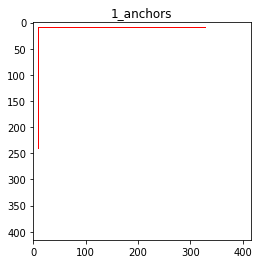


193 149
365 261


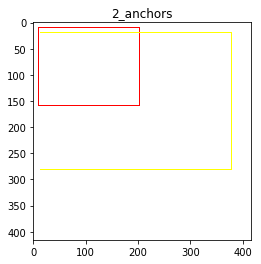


157 132
307 201
381 284


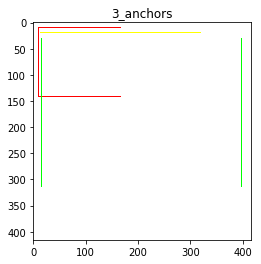


155 128
260 225
363 176
385 284


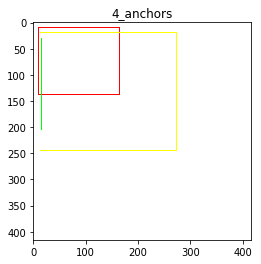


142 113
208 188
301 250
361 172
396 286


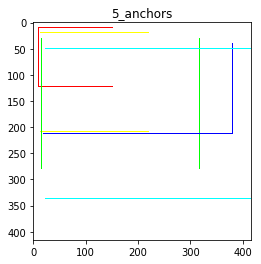


135 112
200 188
292 250
324 144
385 214
393 295


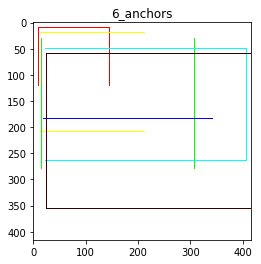


128 103
178 167
256 226
324 142
326 273
382 211
404 295


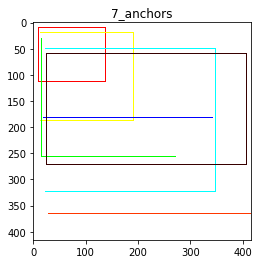


123 99
172 158
231 225
304 198
320 272
322 129
393 214
402 296


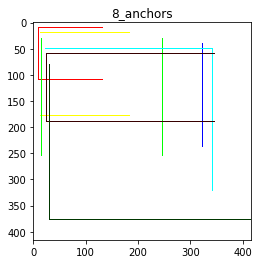


119 95
158 153
222 191
270 244
299 120
334 281
361 177
385 232
405 299


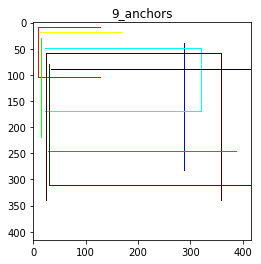


115 94
156 152
212 208
242 121
289 221
314 281
353 140
382 192
390 248
403 303


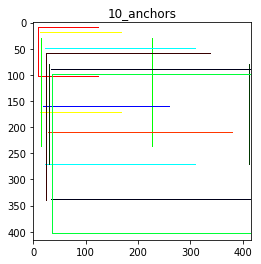


Done!


In [3]:
wn_in_yolov2 = [416, 416]
dataset_disk = '/Volumes/JS/UECFOOD100_JS/'
visualize(wn_in_yolov2)